In [17]:
import get_dm_halo
import make_sz_cluster
import utils
import read_yaml
import load_vars
from math import e, log

import numpy as np
import os
import shutil
import matplotlib.pyplot as plt
import pandas as pd

from astropy.constants import M_sun
from astropy.constants import G
from astropy import units as u

This notebook is a copy of the run_sims, with the M and z distributions taken out to focus more on the pressure profiles.

Main question is the units of Pth, because as it stands it is unitless. There is also a problem with the y-axis of the plot, because in the paper the max is 0.1.

In [19]:
ref=read_yaml.YAMLOperator('./inputdata.yaml').parse_yaml() #Read in the .yaml for this simulation run 

In [20]:
(survey,survey_freq,beam_size,noise_level,image_size,pixel_scale)=load_vars.load_vars().make_dict(ref) #Make a dictionary from the .yaml

In [22]:
(cosmo,sigma8,ns)=load_vars.load_vars().flatLCDM(ref) #Make cosmology from yaml input parameters 

In [23]:
#Generate a new flat z, Mvir distribution and save to file: 
halo=get_dm_halo.GenerateHalo() #Load in get_dm_halo class
szcluster=make_sz_cluster.GenerateCluster() #Load in make_sz_cluster class
szcluster2=make_sz_cluster8.GenerateCluster() #Load in make_sz_cluster class
nsources=1000 #Number of halos to generate

In [24]:
r=np.linspace(0.01,10,10000) #arcmin
r=utils.arcmin_to_Mpc(r,0.5,cosmo)

In [210]:
z=0.5
Mvir=1.5e13 #solar masses

In [211]:
(M200,R200,c200)=halo.vir_to_200_colossus(cosmo,sigma8,ns,Mvir,z) 
#Convert virial mass to M200 and get R200, concentration from Colossus
print(M200)
print(R200)
print(cosmo.critical_density(z))
print((cosmo.Ob0/cosmo.Om0))

13364187804639.152
0.3693833109311574
1.4919685005882565e-29 g / cm3
0.15555555555555556


In [212]:
P200 = szcluster.P200_Battaglia2012(cosmo,z,M200,R200) #P200 from Battaglia et al. 2012
print(P200)

0.00022540377009625437 keV / cm3


In [231]:
P0=szcluster.param_Battaglia2012(18.1,0.154,-0.758,M200,z) #Parameter computation from Table 1 Battaglia et al. 2012
xc=szcluster.param_Battaglia2012(0.497,-0.00865,0.731,M200,z)
beta=szcluster.param_Battaglia2012(4.35,0.0393,0.415,M200,z) #no units

In [232]:
Pth=szcluster.Pth_Battaglia2012(cosmo,r,z,R200,-0.3,1.0,beta,xc,P0,P200,M200) #Output Battaglia 2012 pressure profile
#unitless?
#Pth*(u.keV/u.cm**3)
smth=np.average(Pth)
print(Pth-smth)
lol=(100*(Pth-smth))/smth
print(lol)
print(Pth)

[27.19434154 26.14603803 25.2014677  ... -0.17584534 -0.17584534
 -0.17584534]
[15464.82020224 14868.67319652 14331.51695284 ...   -99.99935387
   -99.99935418   -99.99935449]
[2.73701880e+01 2.63218845e+01 2.53773142e+01 ... 1.13620005e-06
 1.13564908e-06 1.13509842e-06]


In [223]:
Pth_rescaled=(Pth/P200)*(r/R200)**3.
print(np.max(Pth_rescaled))

527.1695641548753 cm3 / keV


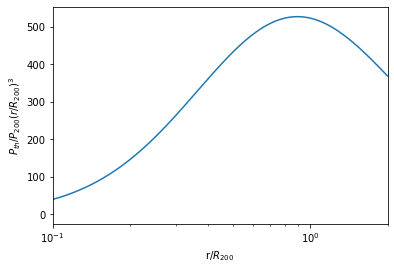

In [230]:
plt.plot(r/R200,Pth_rescaled) #Plot Battaglia 2012 pressure profile: this needs to be checked.
plt.xscale('log')
plt.ylabel('$P_{th}/P_{200}(r/R_{200})^3$')
plt.xlabel('r/$R_{200}$')
plt.xlim(.10,2)
plt.show()

In [34]:
x=r/R200
ros=Mvir/((4/3)*np.pi*R200**3)
ro=rho_s/(x*(1+x)**2)
ro_rescaled=ro/rho_s

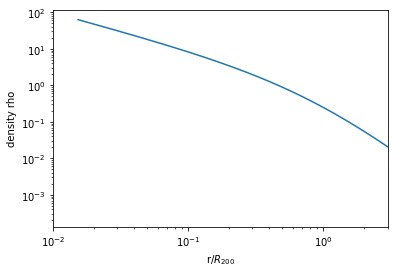

In [35]:
plt.plot(r/R200,ro_rescaled) #Plot Battaglia 2012 pressure profile: this needs to be checked
plt.xscale('log')
plt.yscale('log')
plt.ylabel('density rho')
plt.xlabel('r/$R_{200}$')
plt.xlim(10**-2,3)
plt.show()

In [33]:
cnfw=(5.71*(1+z)**-0.47)*(M200/(2*10**12))**-0.084
Rs=R200/cnfw
rho_s = M200 / ((4*np.pi*Rs**3) * (np.log(1 + cnfw) - cnfw / (1 + cnfw)))
rho_gnfw=(rho_s*(x/xc)**-0.2)*(1+(x/xc)**1)**(-(beta-0.2)/1)
rho_rescaled=rho_gnfw/rho_s

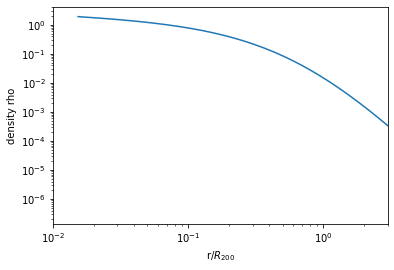

In [36]:
plt.plot(r/R200,rho_rescaled) #Plot NFW profile
plt.xscale('log')
plt.yscale('log')
plt.ylabel('density rho')
plt.xlabel('r/$R_{200}$')
plt.xlim(10**-2,3)
plt.show()